# Initial Data Exploration

This notebook performs initial data exploration on the healthcare service quality dataset. We will load the data, examine its basic properties, check for missing values, calculate summary statistics, and visualize data distributions.

## Import Required Libraries
Import libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation, numerical operations, and visualization.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Load the Dataset
Load the dataset into a pandas DataFrame. Replace `'your_dataset.csv'` with the actual path to your data file.

In [8]:
# Load the dataset
# Make sure to replace 'your_dataset.csv' with the correct file path
try:
    df = pd.read_csv('your_dataset.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please update the file path.")
    # Create a dummy dataframe for demonstration if file not found
    data = {'Feature1': np.random.rand(100),
            'Feature2': np.random.randint(1, 10, 100),
            'Category': np.random.choice(['A', 'B', 'C'], 100),
            'Target': np.random.choice([0, 1], 100)}
    df = pd.DataFrame(data)
    df.iloc[5:15, 0] = np.nan # Introduce some missing values for demonstration
    print("Loaded dummy data for demonstration.")


Error: Dataset file not found. Please update the file path.
Loaded dummy data for demonstration.


## Display Basic Information
Use methods like `head()`, `info()`, and `shape` to display the first few rows, data types, non-null counts, and the dimensions of the dataset.

In [9]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset information (data types, non-null counts)
print("\nDataset Information:")
df.info()

# Display the shape of the dataset (rows, columns)
print("\nDataset Shape (rows, columns):")
print(df.shape)

First 5 rows of the dataset:
   Feature1  Feature2 Category  Target
0  0.310597         9        C       1
1  0.796035         5        C       0
2  0.861107         2        A       1
3  0.473332         9        A       0
4  0.430452         9        C       1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  90 non-null     float64
 1   Feature2  100 non-null    int32  
 2   Category  100 non-null    object 
 3   Target    100 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 2.9+ KB

Dataset Shape (rows, columns):
(100, 4)


## Check for Missing Values
Check for missing values using `isnull().sum()` to count missing values per column. Visualize the missing values using a heatmap for a quick overview.

Missing values per column:
Feature1    10
Feature2     0
Category     0
Target       0
dtype: int64


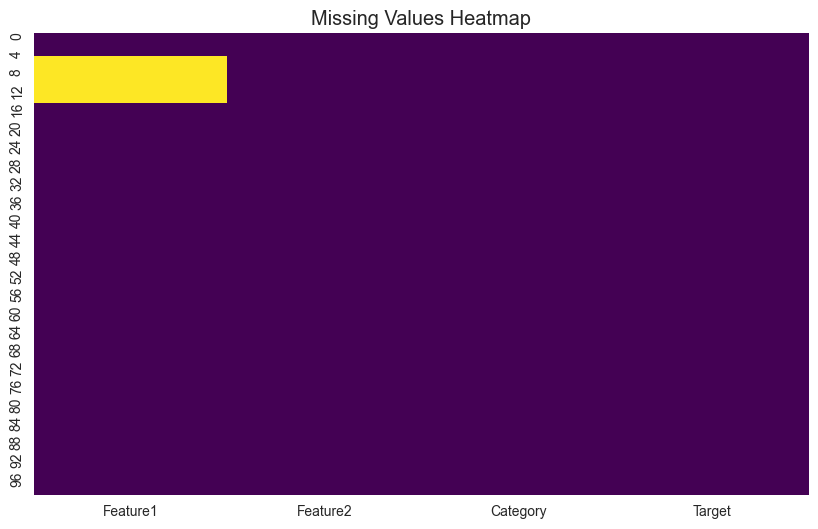

In [10]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Summary Statistics
Generate summary statistics for numerical features using the `describe()` method. This includes count, mean, standard deviation, minimum, maximum, and quartile values.

In [11]:
# Generate summary statistics for numerical columns
print("Summary Statistics for Numerical Features:")
print(df.describe())

# Generate summary statistics for categorical columns (if any)
print("\nSummary Statistics for Categorical Features:")
print(df.describe(include=['object', 'category']))

Summary Statistics for Numerical Features:
        Feature1    Feature2      Target
count  90.000000  100.000000  100.000000
mean    0.539611    4.980000    0.410000
std     0.276375    2.570147    0.494311
min     0.005863    1.000000    0.000000
25%     0.328804    3.000000    0.000000
50%     0.546684    5.000000    0.000000
75%     0.773554    7.000000    1.000000
max     0.988129    9.000000    1.000000

Summary Statistics for Categorical Features:
       Category
count       100
unique        3
top           C
freq         38


## Visualize Data Distributions
Create visualizations like histograms, boxplots, or pairplots to understand the distributions of individual features and the relationships between them.


Histograms for Numerical Features:


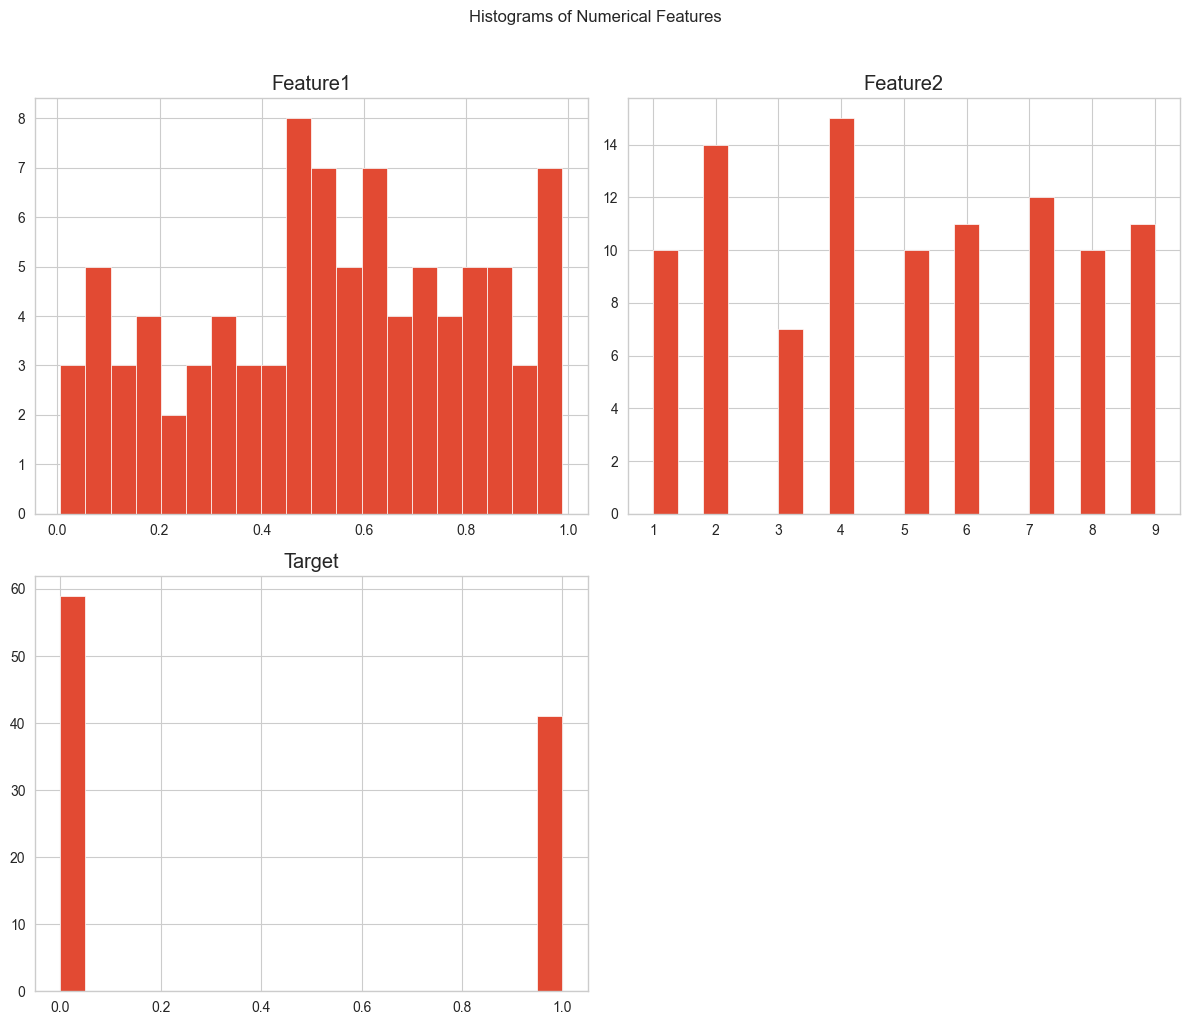


Boxplots for Numerical Features:


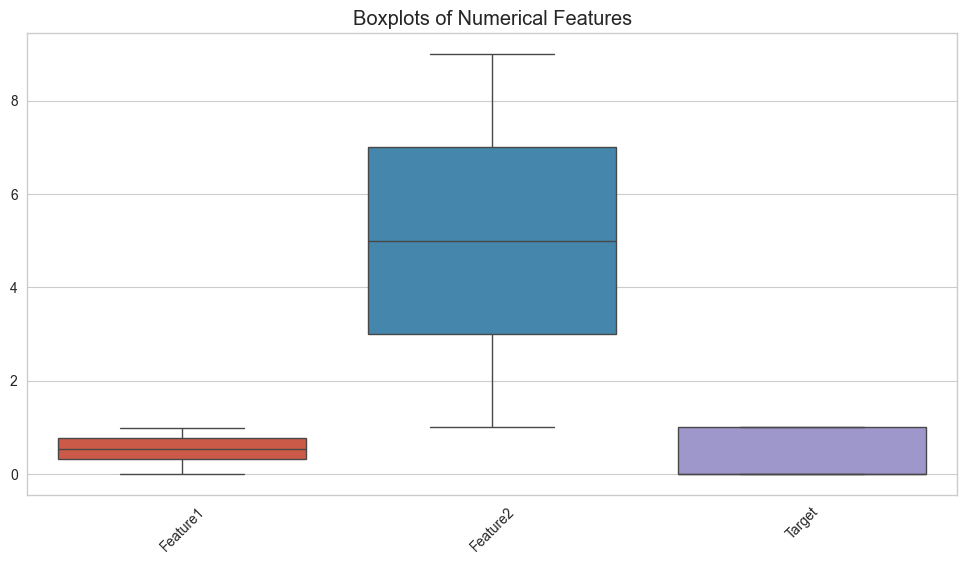


Pairplot of Numerical Features:


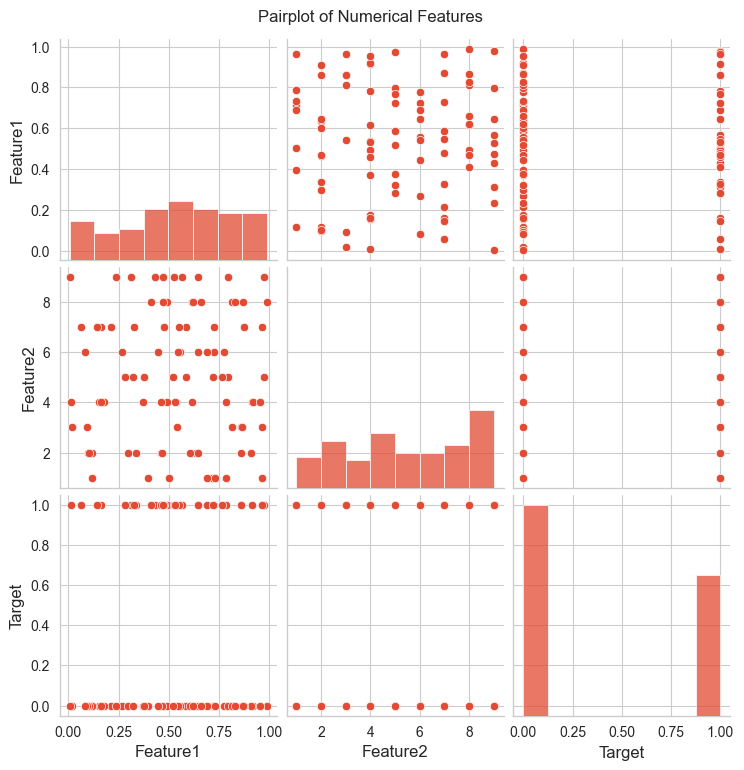


Boxplot of Feature1 grouped by Category:


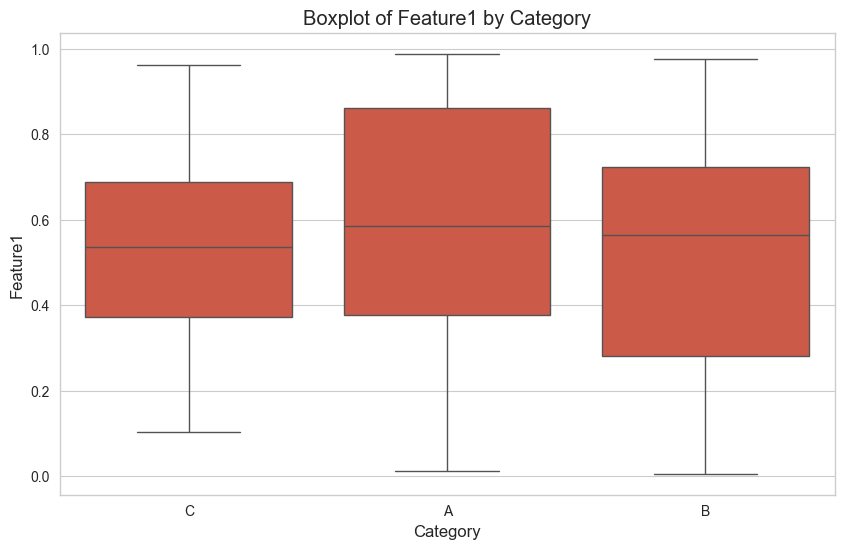

In [12]:
# Select numerical columns for visualization
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot histograms for numerical features
print("\nHistograms for Numerical Features:")
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

# Plot boxplots for numerical features
print("\nBoxplots for Numerical Features:")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Plot pairplot for relationships between numerical features (optional, can be slow for many features)
# Consider using a subset of features if the dataset is large
if len(numerical_cols) > 1 and len(numerical_cols) < 10: # Limit pairplot to datasets with < 10 numerical features for performance
    print("\nPairplot of Numerical Features:")
    sns.pairplot(df[numerical_cols].dropna()) # Drop NA for pairplot
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()
elif len(numerical_cols) >= 10:
    print("\nSkipping pairplot due to large number of numerical features (>10).")

# Example: Boxplot for a numerical feature grouped by a categorical feature
# Replace 'Category' and 'Feature1' with actual column names from your dataset
if 'Category' in df.columns and 'Feature1' in df.columns:
    print("\nBoxplot of Feature1 grouped by Category:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Category', y='Feature1', data=df)
    plt.title('Boxplot of Feature1 by Category')
    plt.show()

End of Initial Data Exploration. Further analysis can include more specific visualizations, correlation analysis, and feature engineering based on these initial findings.